<a href="https://colab.research.google.com/github/brycgonz/Tesis-Analisis-corrosion/blob/main/tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta="/content/drive/MyDrive/tesis/dataset.XLSX"
data=pd.read_excel(ruta)
data.head()

,num,C,Si,Mn,P,S,Cr,Ni,Cu,Mo,...,Salinity (Sal.),Cl-,HCO-,Ca2+,Mg2+,Na+,SO42-,pH,Time,pit
0,unit,Wt%,Wt%,Wt%,Wt%,Wt%,Wt%,Wt%,Wt%,Wt%,...,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,\,h,NaN
1,1,0.17,0.32,1.26,0.014,0.01,0.024,0.017,0,0,...,0,0,0,0,0,0,0,3.39,2,No
2,2,0.17,0.32,1.26,0.014,0.01,0.024,0.017,0,0,...,0,0,0,0,0,0,0,3.39,6,No
3,3,0.17,0.32,1.26,0.014,0.01,0.024,0.017,0,0,...,0,0,0,0,0,0,0,3.39,18,No
4,4,0.17,0.32,1.26,0.014,0.01,0.024,0.017,0,0,...,0,0,0,0,0,0,0,3.39,24,No


DATOS FALTANTES: Con data.shape y data.info se pueden verificar las variables que cuentan con missing values.

In [4]:
print("el tamaño de los datos por filas y columnas es",data.shape)
print("los datos son de tipo:",data.info())

el tamaño de los datos por filas y columnas es (101, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   num                  101 non-null    object
 1   C                    101 non-null    object
 2   Si                   101 non-null    object
 3   Mn                   101 non-null    object
 4   P                    101 non-null    object
 5   S                    101 non-null    object
 6   Cr                   101 non-null    object
 7   Ni                   101 non-null    object
 8   Cu                   101 non-null    object
 9   Mo                   101 non-null    object
 10  Ti                   101 non-null    object
 11  Nb                   101 non-null    object
 12  Al                   101 non-null    object
 13  V                    101 non-null    object
 14  Temperature          101 non-null    object
 15  

Se tuvo inicialmente 101 registros. Cuando se usa se usa la función info de pandas, se puede observar que casi todas las columnas (variables) tienen la misma cantidad de registros, excepto la columna pitting que tiene 100 registros. Viendo el dataset mediante la función data.head, se puede verificar que el registro faltante se refiere a la unidad de la variable pitting(que en este caso no tiene unidades). Por lo que se procede a eliminar toda la fila en la que se encuentra este valor nulo, ya que no es una fila significativa.

Mediante la función dropna de pandas, se procedió a eliminar la fila completa donde se encuentra la celda con el dato faltante. inplace=True permite sobreescribir el resultado de eliminar la fila con el dato faltante, en el mismo dataset original. Con data.info() se imprime el dataset para verificar que ahora se tiene la misma cantidad de filas en todas la columnas que se está analizando.


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   num                  100 non-null    object
 1   C                    100 non-null    object
 2   Si                   100 non-null    object
 3   Mn                   100 non-null    object
 4   P                    100 non-null    object
 5   S                    100 non-null    object
 6   Cr                   100 non-null    object
 7   Ni                   100 non-null    object
 8   Cu                   100 non-null    object
 9   Mo                   100 non-null    object
 10  Ti                   100 non-null    object
 11  Nb                   100 non-null    object
 12  Al                   100 non-null    object
 13  V                    100 non-null    object
 14  Temperature          100 non-null    object
 15  H2S                  100 non-null    object
 16  CO2     

In [6]:
df_num=data.loc[:,data.columns!="pit"].astype("float64")
df_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num                  100 non-null    float64
 1   C                    100 non-null    float64
 2   Si                   100 non-null    float64
 3   Mn                   100 non-null    float64
 4   P                    100 non-null    float64
 5   S                    100 non-null    float64
 6   Cr                   100 non-null    float64
 7   Ni                   100 non-null    float64
 8   Cu                   100 non-null    float64
 9   Mo                   100 non-null    float64
 10  Ti                   100 non-null    float64
 11  Nb                   100 non-null    float64
 12  Al                   100 non-null    float64
 13  V                    100 non-null    float64
 14  Temperature          100 non-null    float64
 15  H2S                  100 non-null    flo

  Como se puede observar, todas las columnas tienen como tipo de dato un objeto. Esto podría presentar problemas posteriormente en el análisis exploratorio y modelado por lo que se necesita cambiar el tipo de dato a las columnas a float, excepto la variable categórica "pit". Para ello se usó la función astype que permite cambiar el tipo de dato a las columnas.
  - La primera línea sirve para seleccionar todo el dataset excepto la columna "pit".
  - Mediante la función astype se cambia el tipo dato de objeto a flotante.
Se crea una nueva variable llamada dataset, que concatena el dataset de las variables numéricas con la columna de la variable categórica "pit".

In [7]:
dataset=pd.concat([df_num,data["pit"]],axis=1,join="outer")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num                  100 non-null    float64
 1   C                    100 non-null    float64
 2   Si                   100 non-null    float64
 3   Mn                   100 non-null    float64
 4   P                    100 non-null    float64
 5   S                    100 non-null    float64
 6   Cr                   100 non-null    float64
 7   Ni                   100 non-null    float64
 8   Cu                   100 non-null    float64
 9   Mo                   100 non-null    float64
 10  Ti                   100 non-null    float64
 11  Nb                   100 non-null    float64
 12  Al                   100 non-null    float64
 13  V                    100 non-null    float64
 14  Temperature          100 non-null    float64
 15  H2S                  100 non-null    flo

#Columnas irrelevantes.

Se verificó la existencia de columnas numéricas con un sólo valor. Una manera de comprobar que el valor numérico tiene diferentes rangos de valores es observar los valores de desviación estandar. Si la desviación estandar es exactamente igual a 0 quiere decir que en esa columna todos los valores son iguales y por ende, la columna resulta irrelevante. En este caso se puede corroborar que todas las características tienen un std diferente de 0, por lo que se deja el dataset tal y como está.


In [8]:
dataset.describe()

,num,C,Si,Mn,P,S,Cr,Ni,Cu,Mo,...,Fluid velocity (Vs),Salinity (Sal.),Cl-,HCO-,Ca2+,Mg2+,Na+,SO42-,pH,Time
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.184700,0.264300,1.078500,0.010480,0.007188,0.242040,0.020442,0.011200,0.140040,...,0.330000,93860.418000,57244.712000,288.53200,4624.920000,825.040000,30813.694000,63.520000,3.774600,130.480000
std,29.011492,0.075203,0.040508,0.392563,0.002607,0.004659,0.401934,0.052263,0.028378,0.243008,...,0.518448,78489.939943,48461.460788,1113.41474,6113.797612,1253.071039,28402.198876,77.359515,0.679128,62.712504
min,1.000000,0.070000,0.220000,0.410000,0.006000,0.001000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.970000,2.000000
25%,25.750000,0.140000,0.230000,0.690000,0.010000,0.005000,0.000000,0.000000,0.000000,0.000000,...,0.000000,28570.000000,15000.000000,0.00000,0.000000,0.000000,8797.000000,0.000000,3.380000,72.000000
50%,50.500000,0.170000,0.270000,1.290000,0.011000,0.006000,0.012000,0.006600,0.000000,0.000000,...,0.000000,62097.000000,39425.000000,54.60000,300.000000,200.000000,18353.150000,15.000000,3.550000,120.000000
75%,75.250000,0.260000,0.280000,1.380000,0.013000,0.010000,0.510000,0.017000,0.000000,0.290000,...,1.000000,176470.600000,107089.000000,195.00000,10732.000000,1464.000000,69133.000000,100.000000,3.857500,168.000000
max,100.000000,0.260000,0.410000,1.450000,0.014000,0.015000,1.270000,0.270000,0.087000,0.720000,...,1.500000,211510.200000,129880.000000,10000.00000,18200.000000,5000.000000,69381.600000,192.000000,6.000000,240.000000


In [9]:

print(f'Tamaño del set antes de eliminar las filas repetidas: {dataset.shape}')
dataset.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {dataset.shape}')

Tamaño del set antes de eliminar las filas repetidas: (100, 28)
Tamaño del set después de eliminar las filas repetidas: (100, 28)


#OUTLIERS
Se generan las gráficas de caja y bigote para cada variable numérica

['num', 'C', 'Si', 'Mn', 'P', 'S', 'Cr', 'Ni', 'Cu', 'Mo', 'Ti', 'Nb', 'Al', 'V', 'Temperature', 'H2S', 'CO2', 'Fluid velocity (Vs)', 'Salinity  (Sal.)', 'Cl-', 'HCO-', 'Ca2+', 'Mg2+', 'Na+', 'SO42-', 'pH', 'Time', 'pit']
28


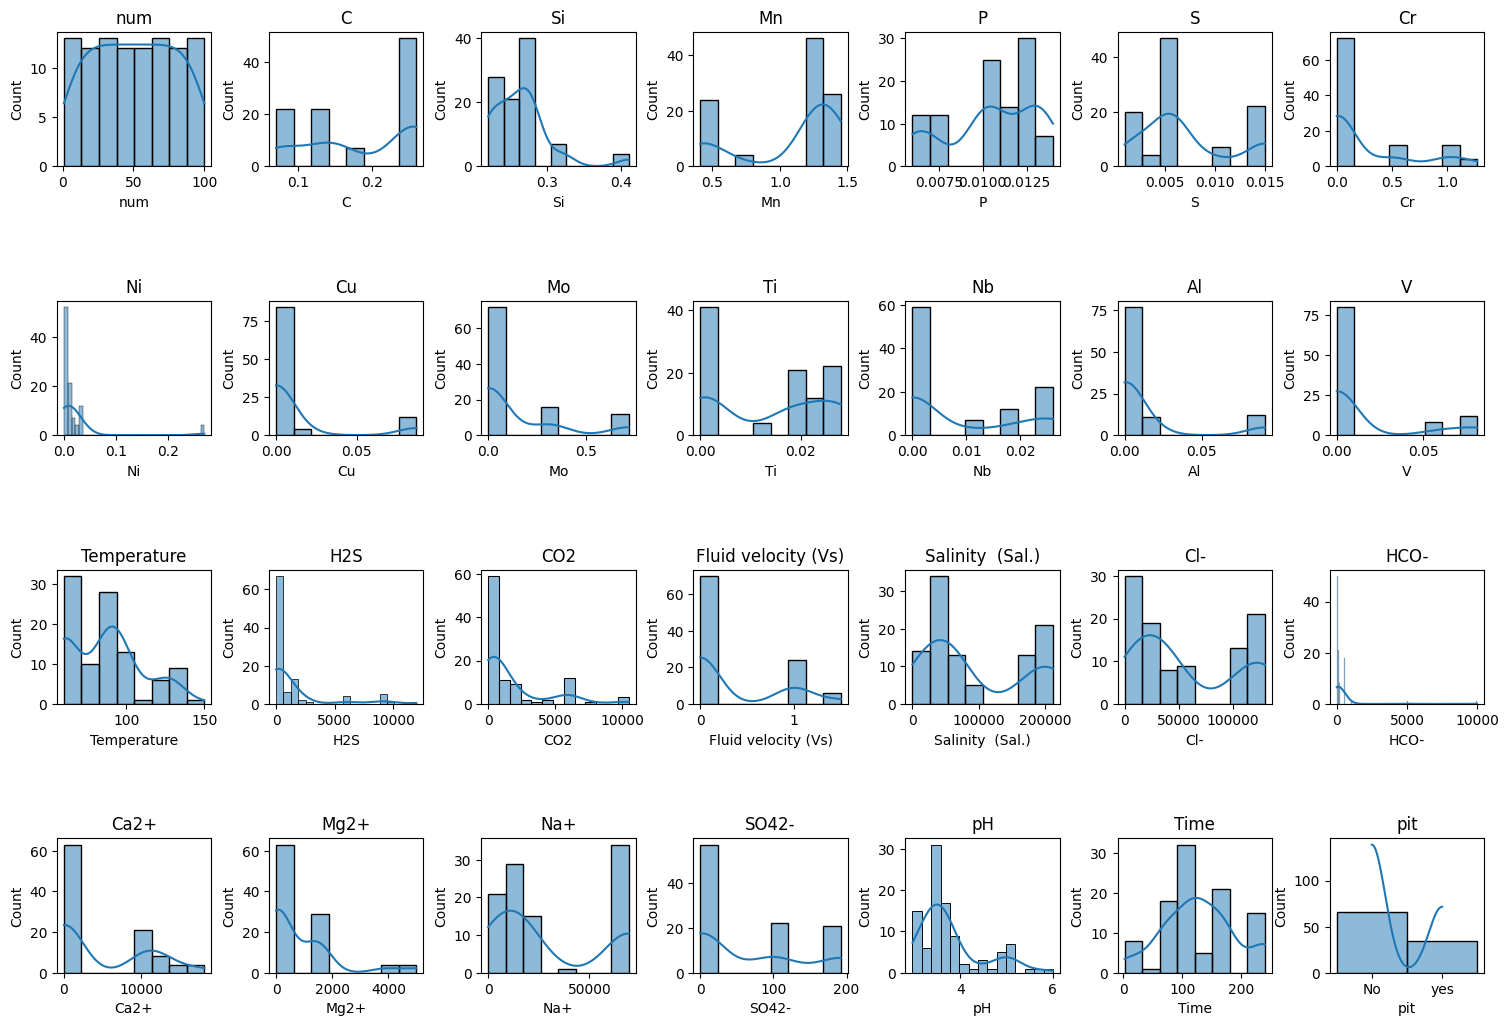

In [10]:
cols_num =dataset.columns.tolist()
print(cols_num)
print(len(cols_num))
fig,ax=plt.subplots(nrows=4,ncols=7,figsize=(15,10))
plt.tight_layout()
fig.subplots_adjust(hspace=1)
for i,col in enumerate(cols_num):
  sns.histplot(x=col,data=dataset,ax=ax[i // 7, i % 7],kde=True)
  ax[i // 7, i % 7].set_title(col)



# Análisis univariado
Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('Co2','T','Hs2','Phis','Cl'c.) y la variable a predecir ('pit').

Esto se conoce como análisis univariado.

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

 Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.


In [11]:
# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0
diccionario = {'yes':1, 'No':0}
binario = dataset['pit'].map(diccionario)
dataset['y_bin'] = binario

# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'y_bin'

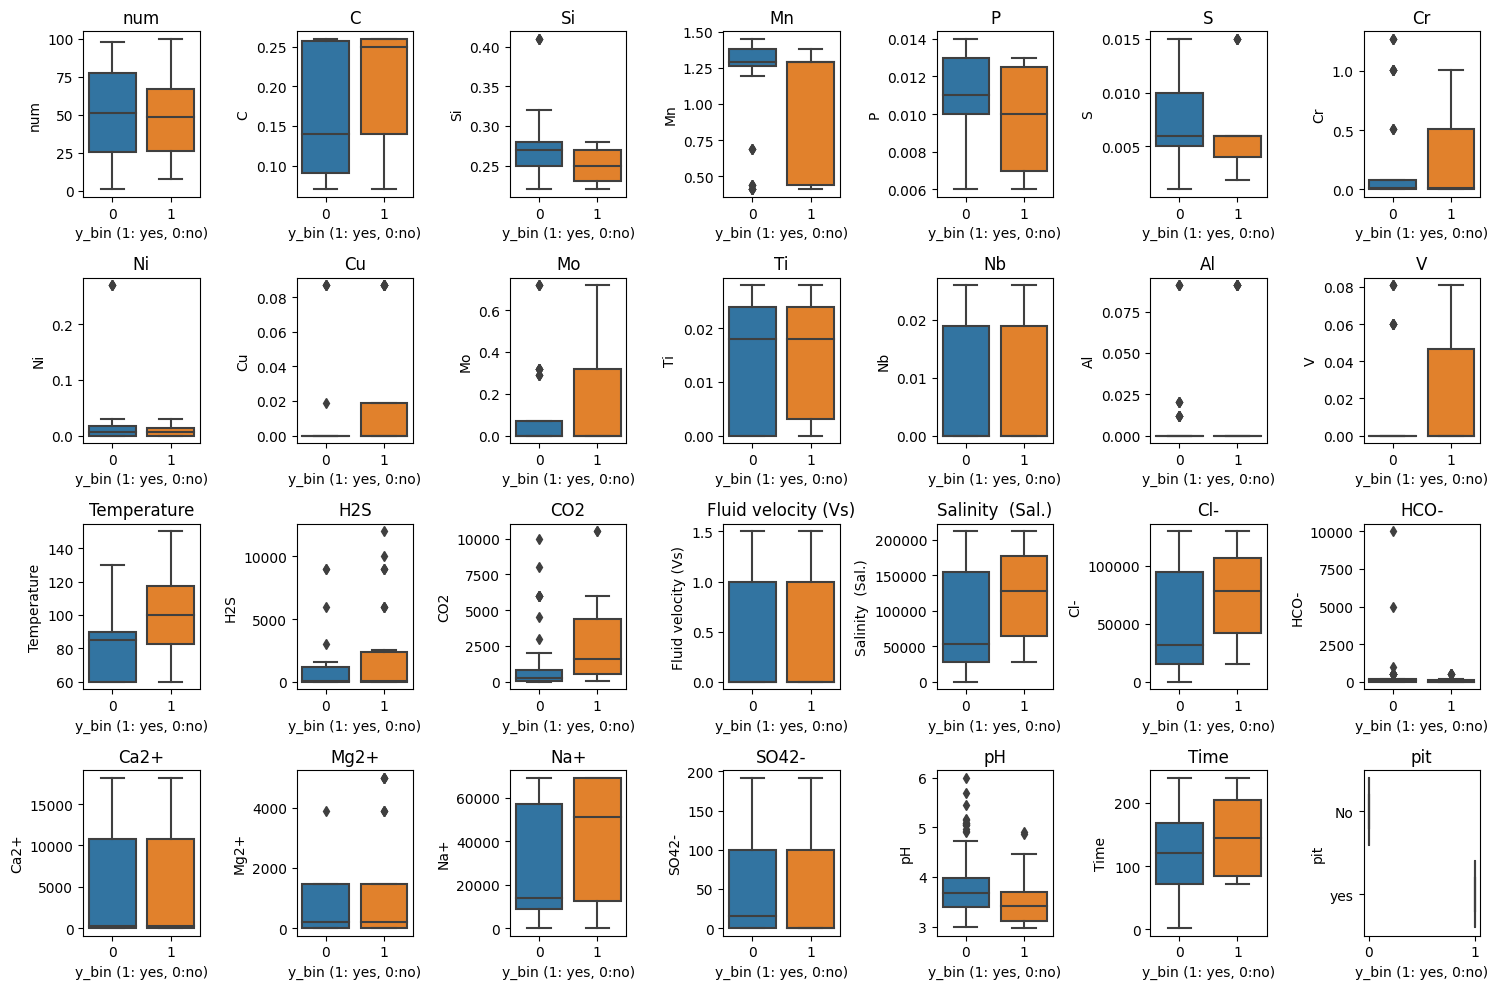

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(15,10))
fig.subplots_adjust(hspace=20)
plt.tight_layout()
for i, col in enumerate(cols_num):
  bplt = sns.boxplot(x="y_bin", y=col, data=dataset, ax=ax[i // 7, i % 7])
  ax[i // 7, i % 7].set_xlabel('y_bin (1: yes, 0:no)')
  plt.tight_layout()
  ax[i // 7, i % 7].set_title(col)
  plt.tight_layout()

In [13]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_num, var_predecir, type='line', order=None):
    x, y = var_num, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = dataset.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_num, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_num, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_num, y='tasa_conv', data=grupo)
        plt.grid()

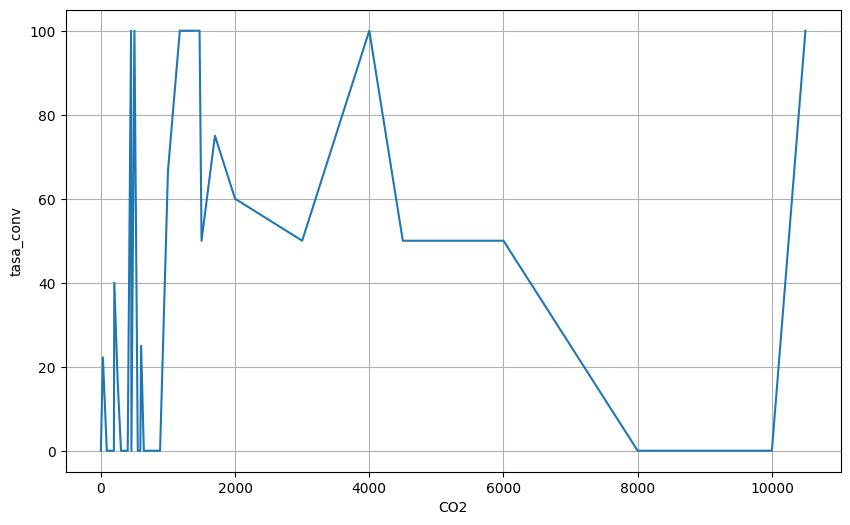

In [14]:
graficar_tasas_conversion('CO2','y_bin')

In [55]:
# Nueva columna en el dataset: "grupos_CO2"
dataset.loc[:,'grupos_CO2'] = "0-1400"
dataset.loc[(dataset['CO2']>1400)&(dataset['CO2']<=4200), 'grupos_CO2'] = "1401-4200"
dataset.loc[(dataset['CO2']>4200)&(dataset['CO2']<=8000), 'grupos_CO2'] = "4201-8000"
dataset.loc[(dataset['CO2']>8000)&(dataset['CO2']<=10000), 'grupos_CO2'] = "8001-10000"



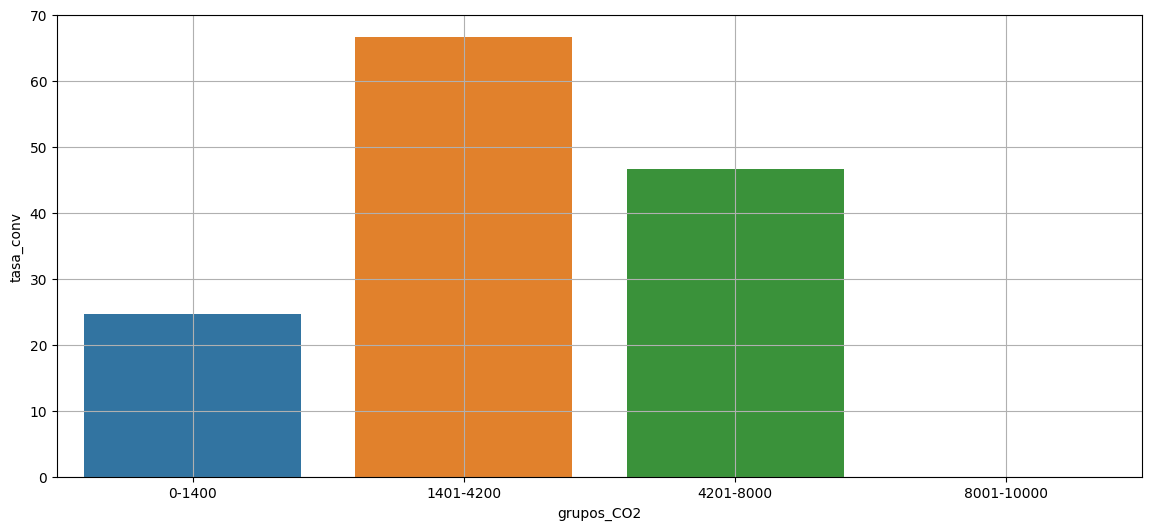

In [56]:
graficar_tasas_conversion('grupos_CO2','y_bin',type='bar')

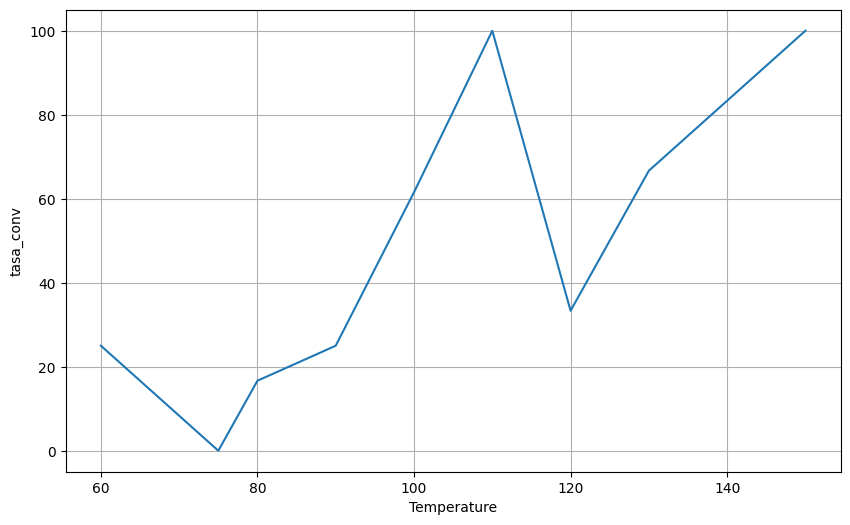

In [18]:
graficar_tasas_conversion('Temperature','y_bin')

In [52]:
# Nueva columna en el dataset: "grupos_T"
dataset.loc[:,'grupos_T'] = "60-78"
dataset.loc[(dataset['Temperature']>78)&(dataset['Temperature']<=100), 'grupos_T'] = "79-100"
dataset.loc[(dataset['Temperature']>100)&(dataset['Temperature']<=120), 'grupos_T'] = "101-120"
dataset.loc[(dataset['Temperature']>120)&(dataset['Temperature']<=150), 'grupos_T'] = "121-150"


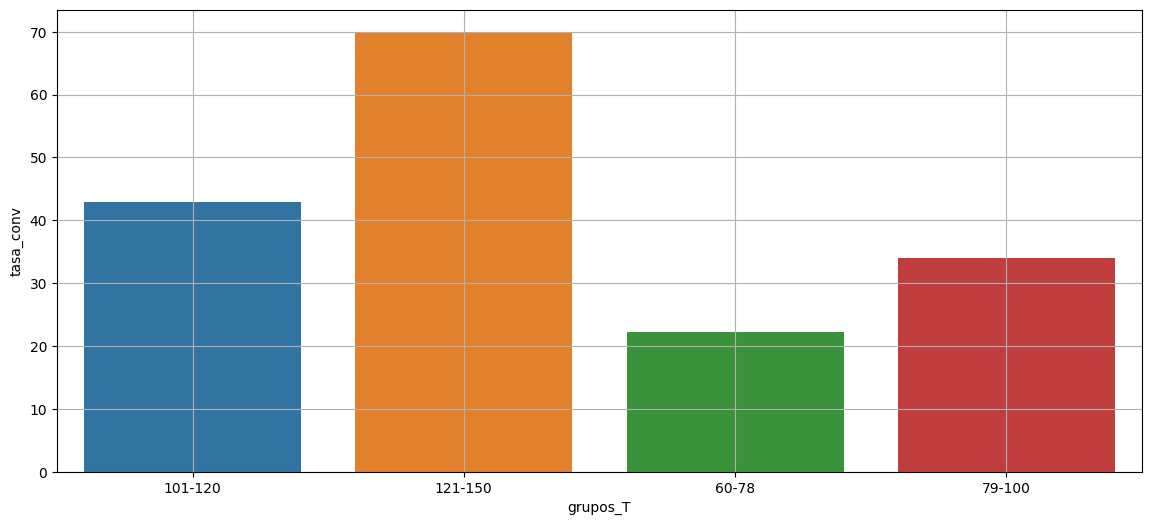

In [53]:
graficar_tasas_conversion('grupos_T','y_bin',type='bar')

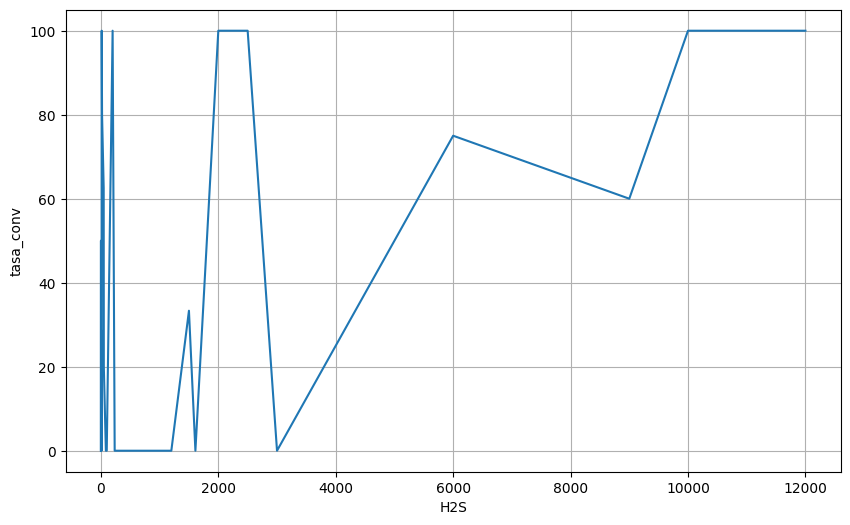

In [54]:
#H2S
graficar_tasas_conversion('H2S','y_bin')


In [58]:
# Nueva columna en el dataset: "grupos_H2S"
dataset.loc[:,'grupos_H2S'] = "0-2000"
dataset.loc[(dataset['H2S']>2000)&(dataset['CO2']<=3000), 'grupos_H2S'] = "2000-3000"
dataset.loc[(dataset['H2S']>3000)&(dataset['CO2']<=6000), 'grupos_H2S'] = "3000-6000"
dataset.loc[(dataset['H2S']>6000)&(dataset['CO2']<=9000), 'grupos_H2S'] = "6000-9000"
dataset.loc[(dataset['H2S']>9000)&(dataset['CO2']<=12000), 'grupos_H2S'] = "9000-12000"


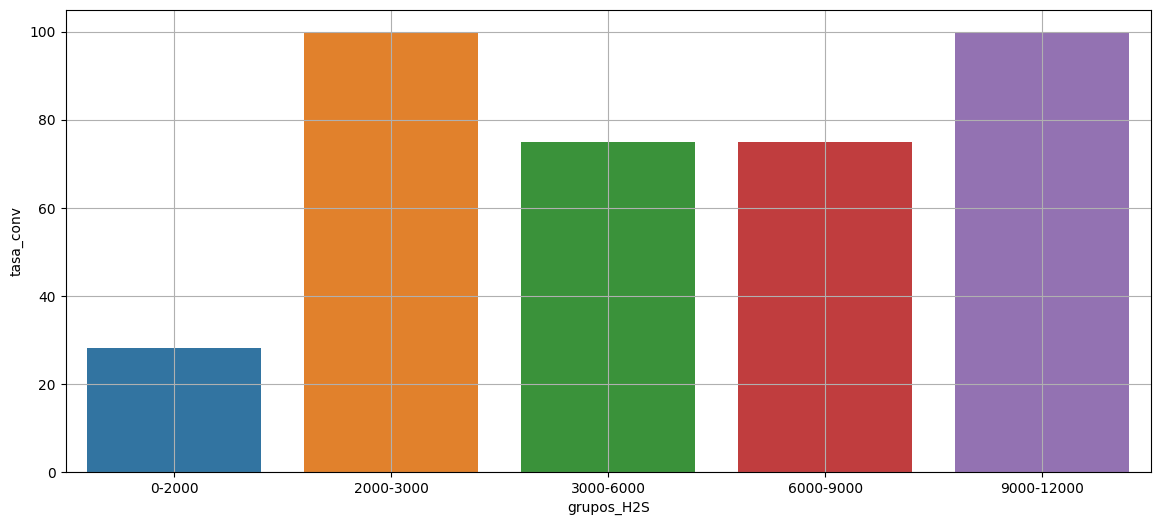

In [60]:
graficar_tasas_conversion('grupos_H2S','y_bin',type='bar')

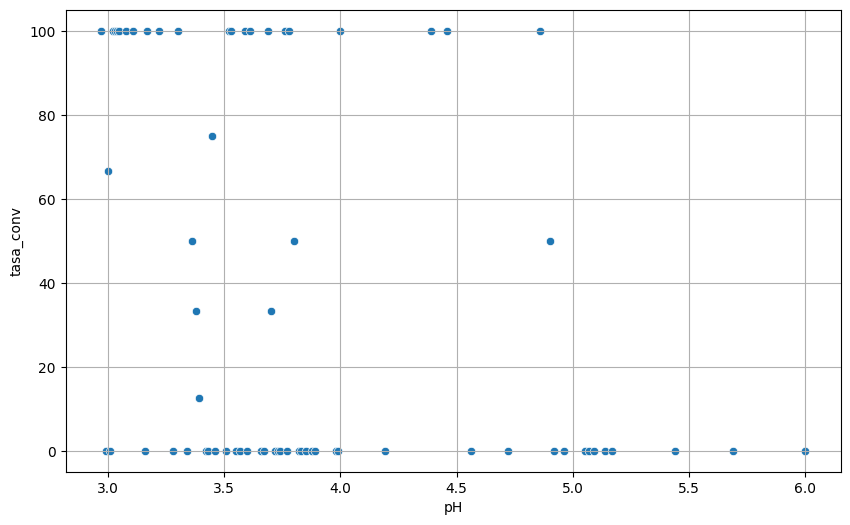

In [64]:
#Phis
graficar_tasas_conversion('pH','y_bin',type="scatter")

In [65]:
# Nueva columna en el dataset: "grupos_CO2"
dataset.loc[:,'grupos_pH'] = "3-3.5"
dataset.loc[(dataset['pH']>3.5)&(dataset['pH']<=4), 'grupos_pH'] = "3.5-4"
dataset.loc[(dataset['pH']>4)&(dataset['pH']<=4.5), 'grupos_pH'] = "4-4.5"
dataset.loc[dataset['pH']>=4.5,'grupos_pH'] = ">4.5"

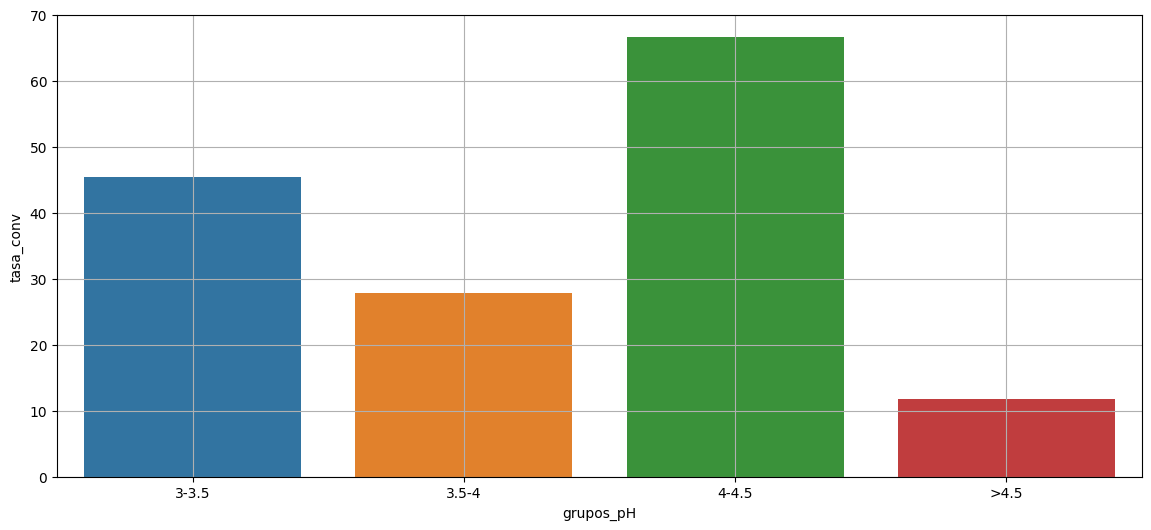

In [66]:
graficar_tasas_conversion('grupos_pH','y_bin',type='bar')